# Db2 Sample For Tensorflow
#### Rohith Ravindranath (rohithravin@ibm.com)
In this code sample, we will show how to use the Db2 Python driver to import data from our Db2 database. Then, we will use that data to create a machine learning model with tensorflow.

## 1. Import Data
Let's first install and import all the libraries needed for this notebook. Most important we will be installing and importing the db2 python driver `ibm_db`.

In [1]:
!pip install tensorflow

     |████████████████████████████████| 105.8MB 9.3MB/s eta 0:00:01     |████████████████████████        | 79.4MB 8.8MB/s eta 0:00:04
     |████████████████████████████████| 51kB 13.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 9.6MB/s  eta 0:00:01
     |████████████████████████████████| 102kB 12.6MB/s ta 0:00:01
     |████████████████████████████████| 1.4MB 13.3MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 491kB 11.5MB/s eta 0:00:01
     |████████████████████████████████| 51kB 6.0MB/s eta 0:00:011
     |████████████████████████████████| 92kB 11.2MB/s eta 0:00:01
  Stored in directory: /Users/rohithravin/Library/Caches/pip/wheels/ee/98/38/46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: /Users/rohithravin/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in di

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
colnames = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','dilute','Proline']
wine = pd.read_csv('data/wine.data', names = colnames,index_col = False) 


In [8]:
# Let's see what our data looks like
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2. Data Exploration

In this step, we are going to try and explore our data inorder to gain insight. We hope to be able to make some assumptions of our data before we start modeling.

In [9]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
# Minimum price of the data
minimum_price = np.amin(wine['Class'])

# Maximum price of the data
maximum_price = np.amax(wine['Class'])

# Mean price of the data
mean_price = np.mean(wine['Class'])

# Median price of the data
median_price = np.median(wine['Class'])

# Standard deviation of prices of the data
std_price = np.std(wine['Class'])

# Show the calculated statistics
print("Statistics for housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for housing dataset:

Minimum price: $1
Maximum price: $3
Mean price: $1.9382022471910112
Median price $2.0
Standard deviation of prices: $0.7728548591122252


In [16]:
wine.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [17]:
corr_matrix = wine.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class                   1.000000
Alcalinity of ash       0.517859
Nonflavanoid phenols    0.489109
Malic acid              0.437776
Color intensity         0.265668
Ash                    -0.049643
Magnesium              -0.209179
Alcohol                -0.328222
Proanthocyanins        -0.499130
Hue                    -0.617369
Proline                -0.633717
Total phenols          -0.719163
dilute                 -0.788230
Flavanoids             -0.847498
Name: Class, dtype: float64

## 3. Data Visualization

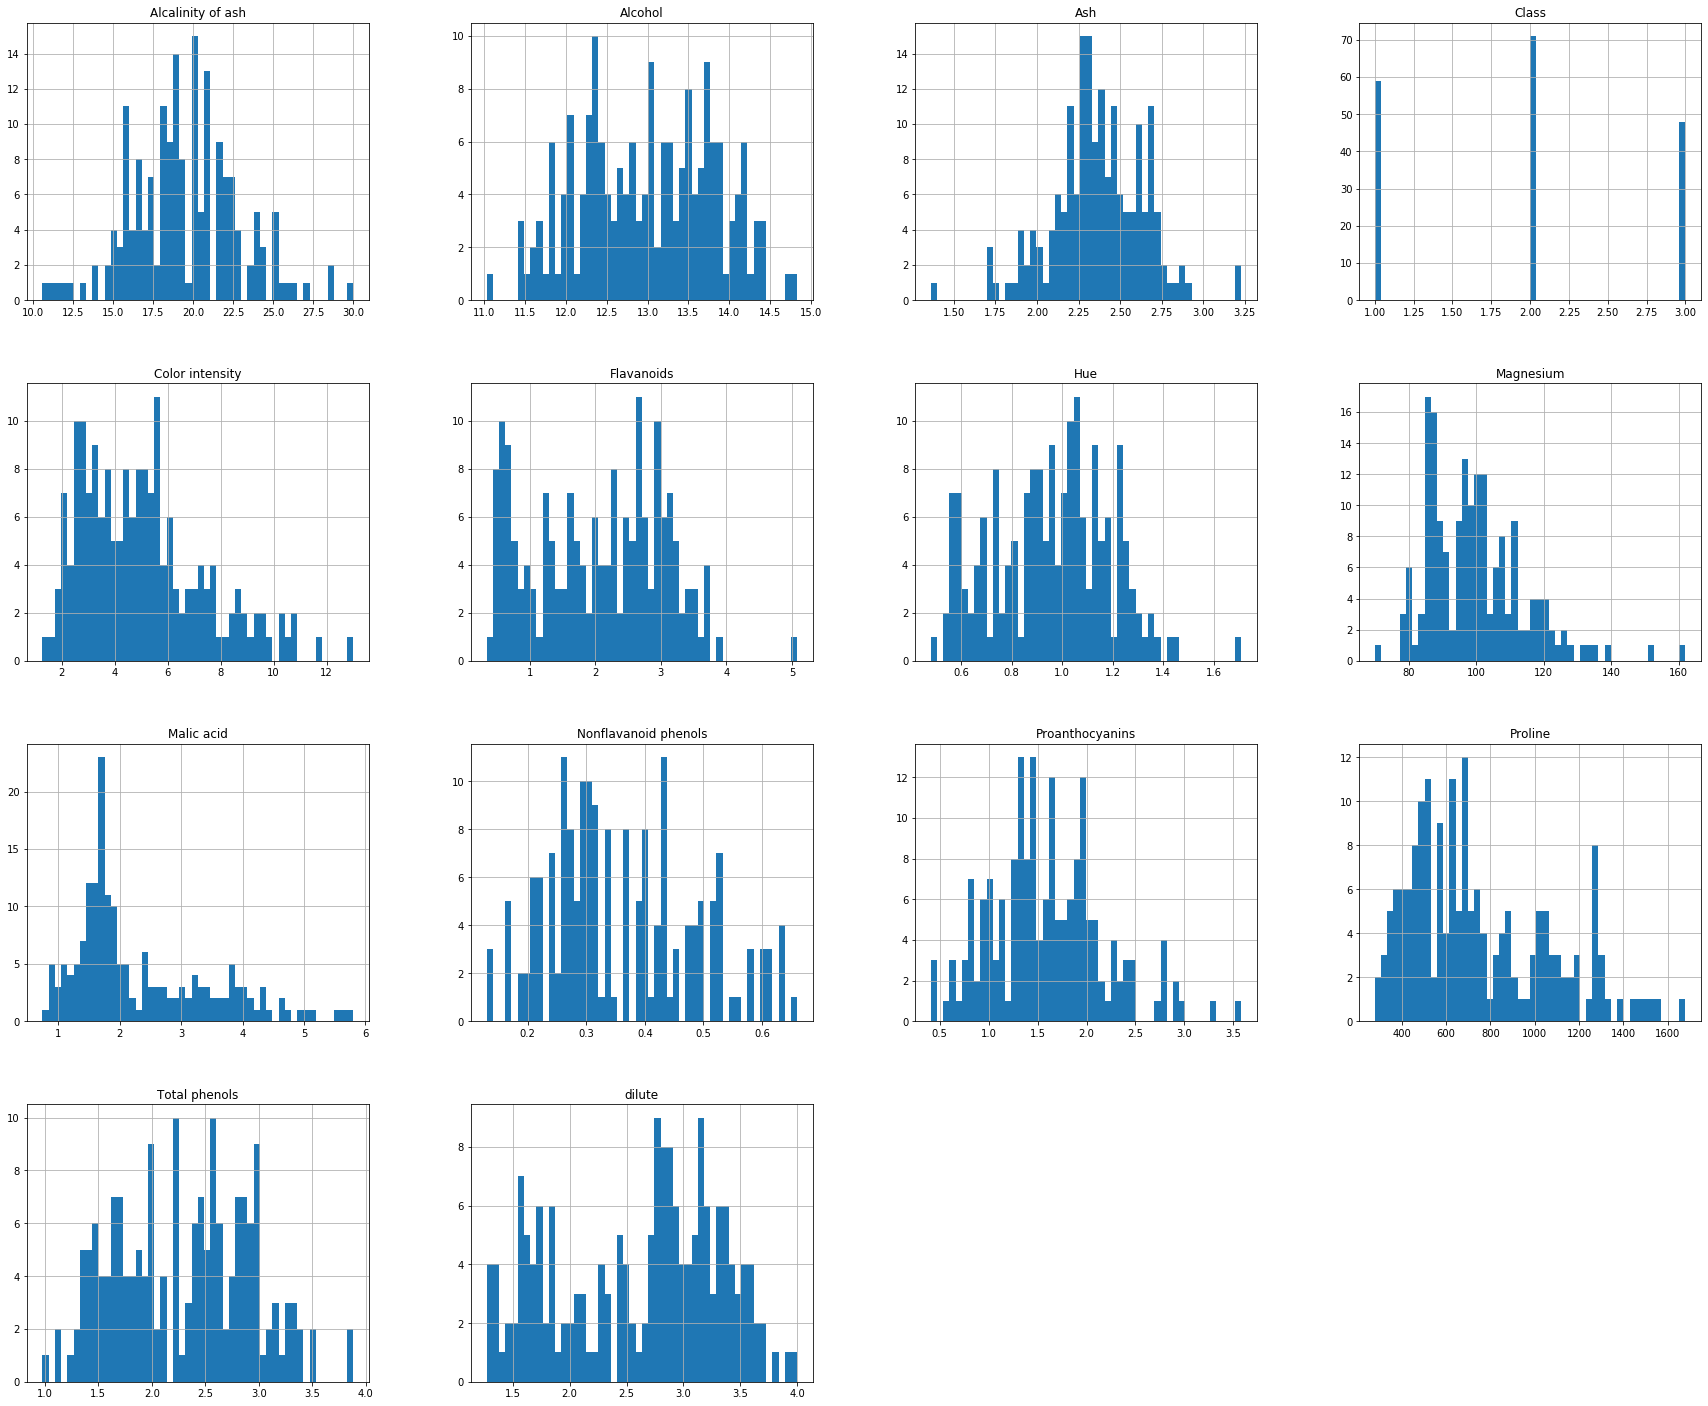

In [11]:
wine.hist(bins=50, figsize=(30,25))
plt.show()

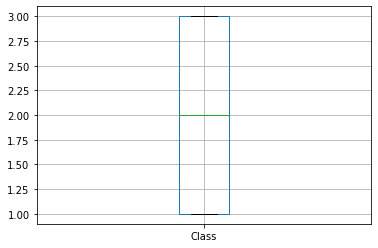

In [15]:
boxplot = wine.boxplot(column=['Class'])

## 4. Pre-Process Data

Before we start creating our model, we need to first pre-process our data for tensorflow.

In [18]:
import tensorflow as tf

In [20]:
# First we convert the Class labels to Onehot format.
df = pd.get_dummies(wine, columns=['Class'])

# Convert labels to numpy array for tensorflow
labels = df.loc[:,['Class_1','Class_2','Class_3']]
labels = labels.values

# Convert features to numpy array for tensorflow
features = df.drop(['Class_1','Class_2','Class_3','Ash'],axis = 1)
features = features.values

# Make sure the type is numpy arrays
print(type(labels))
print(type(features))

# Make sure the shape of the array is correct
print(labels.shape)
print(features.shape)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
(178, 3)
(178, 12)


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into test and train data
train_x,test_x,train_y,test_y = train_test_split(features,labels)

# Verify the shape of the test and train data
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(133, 12) (133, 3) (45, 12) (45, 3)


In [28]:
from sklearn.preprocessing import MinMaxScaler

# NN in tensorflow works better when the data is scaled between (0,1). So let's scale our data
scale = MinMaxScaler(feature_range = (0,1))

train_x = scale.fit_transform(train_x)
test_x = scale.fit_transform(test_x)

# Take a seak peak at our data 
print(train_x[0])
print(train_y[0])

[0.06287425 0.25458248 0.41340782 0.30434783 0.70344828 0.40506329
 0.0754717  0.2943038  0.13410302 0.70103093 0.63498099 0.04778887]
[0 1 0]


## 5. Creating Machine Learning Model

Now that we have cleaned and explored our data. We are ready to build our model that will predict the attribute `Class`. We will be creating a basic neural network with tensorflow to help us predict. 

In [29]:
# Let's first create placeholders for our feature and labels
X = tf.placeholder(tf.float32,[None,12]) # Since we have 12 features as input
y = tf.placeholder(tf.float32,[None,3])  # Since we have 3 outut labels

We are going to create a simple NN model with 2 hidden layters (3 layers in total). They are going to be 80 and 50 respectively.

In [30]:
# Weights and biases for our first hidden layer
weights1 = tf.get_variable("weights1",shape=[12,80],initializer = tf.contrib.layers.xavier_initializer())
biases1 = tf.get_variable("biases1",shape = [80],initializer = tf.zeros_initializer)
layer1out = tf.nn.relu(tf.matmul(X,weights1)+biases1)

# Weights and biases for our second hidden layer
weights2 = tf.get_variable("weights2",shape=[80,50],initializer = tf.contrib.layers.xavier_initializer())
biases2 = tf.get_variable("biases2",shape = [50],initializer = tf.zeros_initializer)
layer2out = tf.nn.relu(tf.matmul(layer1out,weights2)+biases2)

# Weights and biases for our output node
weights3 = tf.get_variable("weights3",shape=[50,3],initializer = tf.contrib.layers.xavier_initializer())
biases3 = tf.get_variable("biases3",shape = [3],initializer = tf.zeros_initializer)
prediction =tf.matmul(layer2out,weights3)+biases3

W0802 14:35:21.301342 4796880320 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [31]:
# We also need to degine the loss funtion. We will be using the softmax_cross_entropy_with_logits_v2 function. 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y))

# I am keeping our learning rate as 0.001, but you can always change that.
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [32]:
acc = []

# This is where we will run our model
with tf.Session() as sess:
    
    # Initilize our variables
    sess.run(tf.global_variables_initializer())
    
    # Train our data over 200 iterations
    for epoch in range(201):
        
        # Train using our NN model we created
        opt,costval = sess.run([optimizer,cost],feed_dict = {X:train_x,y:train_y})
        
        # Calculate how many matches we made
        matches = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        
        # Compute cost and update parameters and also ouput accuracy with current parameters
        accuracy = tf.reduce_mean(tf.cast(matches, 'float'))
        
        # Calculate the accuracy and store it
        acc.append(accuracy.eval({X:test_x,y:test_y}))
        if(epoch % 100 == 0):
            print("Epoch", epoch, "--" , "Cost",costval)
            print("Accuracy on the test set ->",accuracy.eval({X:test_x,y:test_y}))
    print("FINISHED !!!")

Epoch 0 -- Cost 1.1286858
Accuracy on the test set -> 0.15555556
Epoch 100 -- Cost 0.078738645
Accuracy on the test set -> 0.8888889
Epoch 200 -- Cost 0.02239449
Accuracy on the test set -> 0.9111111
FINISHED !!!


Text(0.5, 0, 'Epochs')

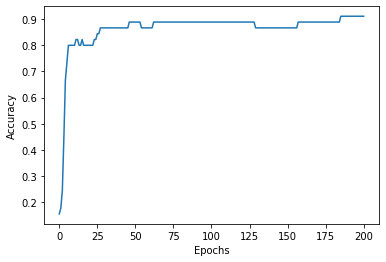

In [34]:
# Lets plot our accuracy over the number of iterations and see how our model did 
plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

Looks like our model did really well with our data. It seems however that we may not have needed to run it over 200 iterations. But that's up to you guys to decide! 